In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv('/content/Airbnb_Open_Data.csv',low_memory=False)


In [9]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,8.001449e+10,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,5.233517e+10,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,7.882924e+10,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,8.509833e+10,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,9.203760e+10,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70093 entries, 0 to 70092
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              70093 non-null  int64  
 1   NAME                            69884 non-null  object 
 2   host id                         70092 non-null  float64
 3   host_identity_verified          69875 non-null  object 
 4   host name                       69809 non-null  object 
 5   neighbourhood group             70063 non-null  object 
 6   neighbourhood                   70076 non-null  object 
 7   lat                             70084 non-null  float64
 8   long                            70084 non-null  float64
 9   country                         69769 non-null  object 
 10  country code                    70006 non-null  object 
 11  instant_bookable                70006 non-null  object 
 12  cancellation_policy             

In [11]:
df.duplicated().value_counts()

,count
False,70093


In [12]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",2.680241e+10,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,24-06-2019,1.34,4.0,3.0,47.0,NaN,NaN


In [23]:
import pandas as pd

# ✅ Step 1: Normalize column names (lowercase + no extra spaces)
df.columns = df.columns.str.strip().str.lower()

# ✅ Step 2: Drop duplicate records
df.drop_duplicates(inplace=True)

# ✅ Step 3: Drop columns only if they exist
cols_to_drop = ['house_rules', 'license']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

# ✅ Step 4: Clean price column (if exists)
if 'price' in df.columns:
    df['price'] = df['price'].str.replace('$', '', regex=False)
    df['price'] = df['price'].str.replace(',', '', regex=False)

# ✅ Step 5: Clean service fee column (if exists)
if 'service fee' in df.columns:
    df['service fee'] = df['service fee'].str.replace('%', '', regex=False)
    df['service fee'] = df['service fee'].str.replace(',', '', regex=False)

# ✅ Step 6: Rename columns safely
rename_map = {}
if 'price' in df.columns:
    rename_map['price'] = 'price_$'
if 'service fee' in df.columns:
    rename_map['service fee'] = 'service_fee_$'
df.rename(columns=rename_map, inplace=True)

# ✅ Step 7: Drop rows with missing values
df.dropna(inplace=True)

# ✅ Step 8: Convert data types safely
if 'price_$' in df.columns:
    df['price_$'] = pd.to_numeric(df['price_$'], errors='coerce')
if 'service_fee_$' in df.columns:
    df['service_fee_$'] = pd.to_numeric(df['service_fee_$'], errors='coerce')

if 'id' in df.columns:
    df['id'] = df['id'].astype(str)
if 'host id' in df.columns:
    df['host id'] = df['host id'].astype(str)
if 'last review' in df.columns:
    df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
if 'construction year' in df.columns:
    df['construction year'] = pd.to_numeric(df['construction year'], errors='coerce').astype('Int64')

# ✅ Step 9: Fix spelling of 'brookin' → 'Brooklyn' (if column exists)
if 'neighbourhood group' in df.columns:
    df.loc[df['neighbourhood group'].str.lower() == 'brookin', 'neighbourhood group'] = 'Brooklyn'

# ✅ Step 10: Remove outliers in 'availability_365' (if column exists)
if 'availability_365' in df.columns:
    df = df[df['availability_365'] <= 500]


In [24]:
df.duplicated().value_counts()

,count
False,57114


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57114 entries, 0 to 70091
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              57114 non-null  object        
 1   name                            57114 non-null  object        
 2   host id                         57114 non-null  object        
 3   host_identity_verified          57114 non-null  object        
 4   host name                       57114 non-null  object        
 5   neighbourhood group             57114 non-null  object        
 6   neighbourhood                   57114 non-null  object        
 7   lat                             57114 non-null  float64       
 8   long                            57114 non-null  float64       
 9   country                         57114 non-null  object        
 10  country code                    57114 non-null  object        
 11  instant

In [26]:
df.describe()

,lat,long,construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,57114.000000,57114.000000,57114.0,57114.000000,0.0,57114.000000,57114.000000,57114,57114.000000,57114.000000,57114.000000,57114.000000
mean,40.727373,-73.947970,2012.496463,625.362345,NaN,8.149893,33.281647,2019-09-22 18:09:00.813110528,1.392155,3.319291,7.933887,153.213048
min,40.504560,-74.249840,2003.0,50.000000,NaN,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687440,-73.982360,2008.0,338.000000,NaN,2.000000,3.000000,2019-01-02 00:00:00,0.230000,2.000000,1.000000,20.000000
50%,40.721650,-73.953740,2012.0,624.000000,NaN,3.000000,11.000000,2019-06-23 00:00:00,0.780000,3.000000,1.000000,128.000000
75%,40.762560,-73.930060,2018.0,913.000000,NaN,5.000000,38.000000,2021-09-01 00:00:00,2.000000,4.000000,3.000000,280.000000
max,40.916970,-73.705220,2022.0,1200.000000,NaN,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056399,0.051279,5.76013,332.131877,NaN,32.199626,55.196921,NaN,1.788582,1.258504,31.257042,133.564916


In [29]:
#what are the different property types in the Dataset?

property_types=df['room type'].value_counts().to_frame()

property_types

,count
room type,
Entire home/apt,31115
Private room,24798
Shared room,1093
Hotel room,108


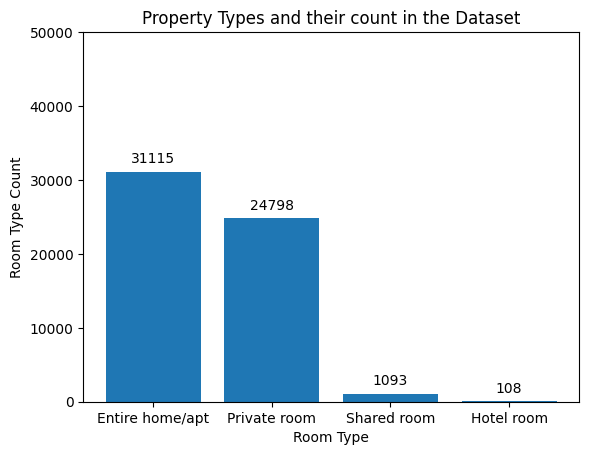

In [30]:
#Room type count plotted on a bar chart
# Bar chart
room_type_bar = plt.bar(property_types.index, property_types["count"])

# Add labels on top of bars
plt.bar_label(room_type_bar, labels=property_types["count"], padding=4)

# Set y-axis limit
plt.ylim([0, 50000])

# Axis labels and title
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types and their count in the Dataset')

# Show the plot
plt.show()

In [31]:
hood_group=df['neighbourhood group'].value_counts().to_frame()

hood_group

,count
neighbourhood group,
Manhattan,23686
Brooklyn,23401
Queens,7845
Bronx,1622
Staten Island,559
brookln,1


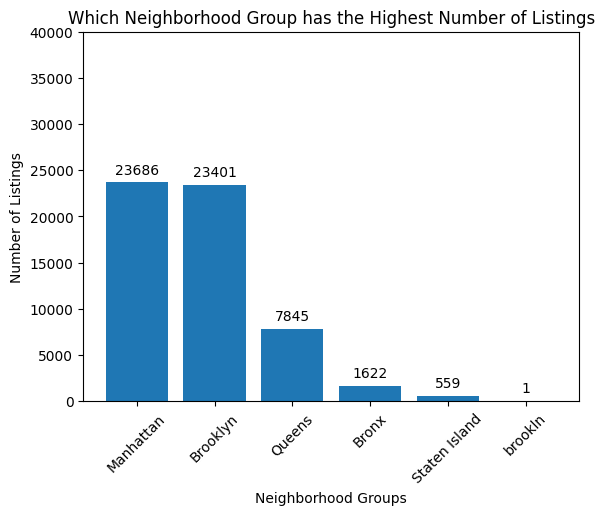

In [32]:

# Create bar chart
# x-axis → hood_group.index (neighborhood groups)
# y-axis → hood_group["count"] (number of listings)
hood_group_bar = plt.bar(hood_group.index, hood_group["count"])

# Add labels on top of each bar
# 'labels=' was missing in your code
plt.bar_label(hood_group_bar, labels=hood_group["count"], padding=4)

# Set y-axis range
plt.ylim([0, 40000])

# Axis labels
plt.xlabel('Neighborhood Groups')
plt.ylabel('Number of Listings')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add title
plt.title('Which Neighborhood Group has the Highest Number of Listings')

# Show plot
plt.show()

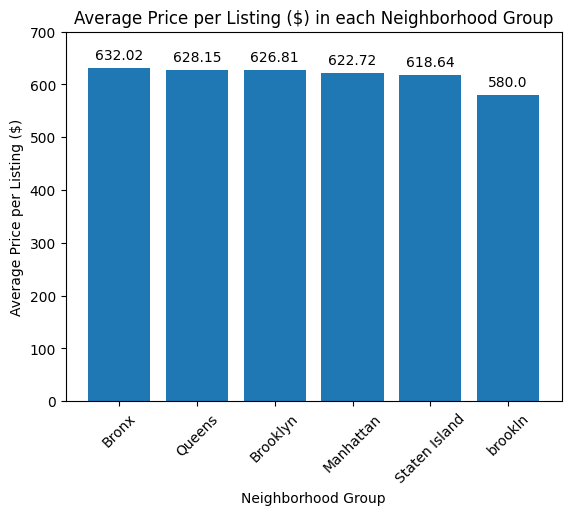

In [33]:
import matplotlib.pyplot as plt

# Step 1: Calculate average price for each neighborhood group
# Group by 'neighbourhood group', take mean of 'price_$', sort descending
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()

# Step 2: Create bar chart
# x-axis → neighborhood groups
# y-axis → their average prices
avg_price_bar = plt.bar(avg_price.index, avg_price['price_$'])

# Step 3: Add labels on top of each bar
# round(..., 2) to keep values up to 2 decimals
plt.bar_label(avg_price_bar, labels=round(avg_price['price_$'], 2), label_type='edge', padding=4)

# Step 4: Adjust chart styling
plt.ylim([0, 700])  # limit y-axis to focus on range
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price per Listing ($)')
plt.xticks(rotation=45)  # rotate labels for readability
plt.title('Average Price per Listing ($) in each Neighborhood Group')

# Step 5: Show plot
plt.show()

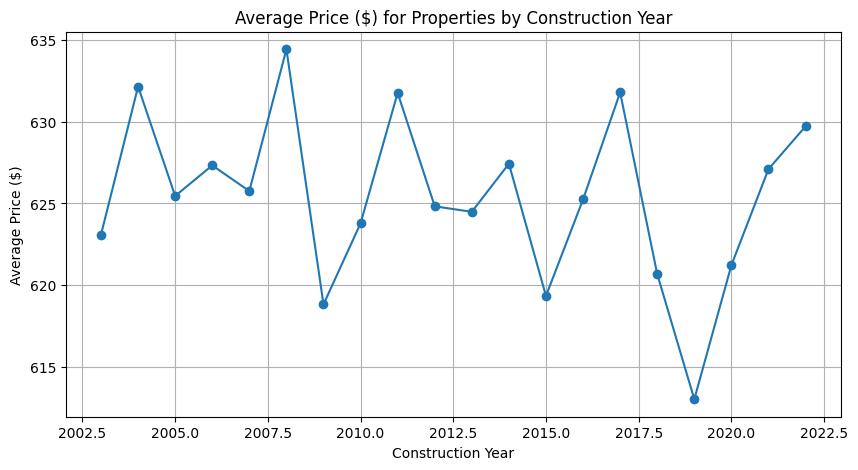

In [35]:
import matplotlib.pyplot as plt

# Step 1: Group by construction year and calculate average price
avg_price_year = df.groupby('construction year')['price_$'].mean().sort_index()

# Step 2: Plot average price by construction year
avg_price_year.plot(kind='line', marker='o', figsize=(10, 5))

# Step 3: Add labels and title
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average Price ($) for Properties by Construction Year')

# Optional: Add grid for better readability
plt.grid(True)

# Step 4: Show plot
plt.show()

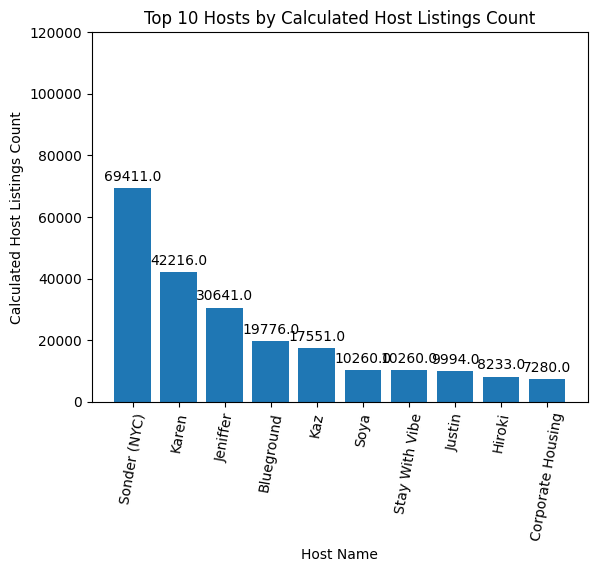

In [36]:
import matplotlib.pyplot as plt

# Step 1: Find top 10 hosts by total calculated host listing count
hosts = (
    df.groupby('host name')['calculated host listings count']
    .sum()
    .sort_values(ascending=False)
    .nlargest(10)
    .to_frame()
)

# Step 2: Create bar chart
hosts_bar = plt.bar(hosts.index, hosts['calculated host listings count'])

# Step 3: Add labels on top of bars
plt.bar_label(
    hosts_bar,
    labels=hosts['calculated host listings count'],
    label_type='edge',
    padding=3
)

# Step 4: Style chart
plt.xlabel('Host Name')
plt.ylabel('Calculated Host Listings Count')
plt.xticks(rotation=80)  # rotate host names for readability
plt.ylim([0, 120000])   # adjust y-axis limit
plt.title('Top 10 Hosts by Calculated Host Listings Count')

# Step 5: Show plot
plt.show()

In [37]:
# Step 1: Group by whether host identity is verified
# Step 2: Take mean review rating for each group
# Step 3: Sort descending for easier interpretation
review = (
    df.groupby('host_identity_verified')['review rate number']
    .mean()
    .sort_values(ascending=False)
    .to_frame()
)

# Display result
print(review)

                        review rate number
host_identity_verified                    
unconfirmed                       3.320765
verified                          3.317817


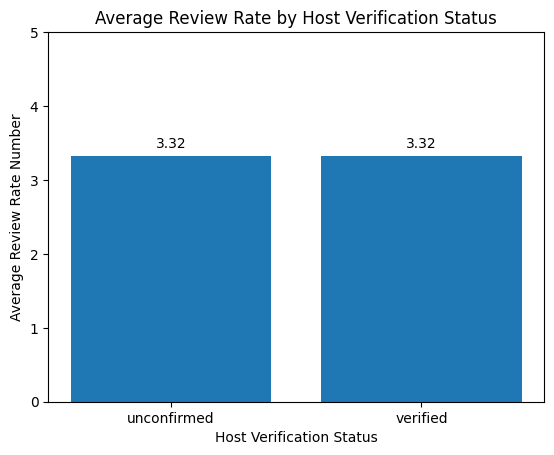

In [38]:
import matplotlib.pyplot as plt

# Step 1: Create bar chart
review_bar = plt.bar(review.index, review["review rate number"])

# Step 2: Add labels on top of each bar
plt.bar_label(
    review_bar,
    labels=review["review rate number"].round(2).tolist(),  # rounded to 2 decimals
    padding=4
)

# Step 3: Style the chart
plt.ylim([0, 5])  # review ratings usually go from 0 to 5
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate by Host Verification Status')

# Step 4: Show chart
plt.show()

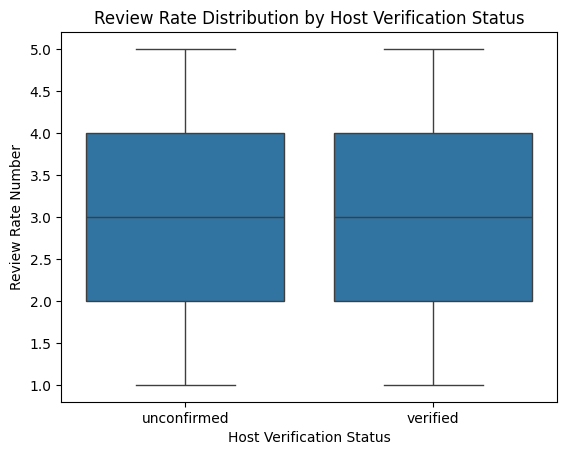

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Choose a base color from seaborn palette
base_color = sns.color_palette()[0]

# Step 2: Create boxplot
sns.boxplot(data=df, x="host_identity_verified", y="review rate number", color=base_color)

# Step 3: Add labels and title
plt.xlabel('Host Verification Status')
plt.ylabel('Review Rate Number')
plt.title('Review Rate Distribution by Host Verification Status')

# Step 4: Show plot
plt.show()

In [41]:
# Correlation between listing price and service fee
df['price_$'].corr(df['service_fee_$'])

nan

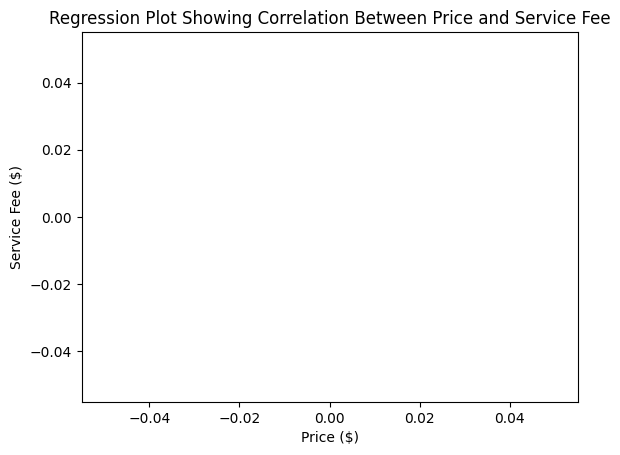

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a regression plot to visualize correlation
sns.regplot(x='price_$', y='service_fee_$', data=df)

# Step 2: Add labels and title
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.title('Regression Plot Showing Correlation Between Price and Service Fee')

# Step 3: Show plot
plt.show()

In [43]:
# Step 1: Group by neighborhood group and room type
# Step 2: Calculate mean review rating for each combination
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()

# Step 3: Display the result
print(ARRN)

                                     review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.409091
                    Private room               3.373614
                    Shared room                3.350000
Brooklyn            Entire home/apt            3.286002
                    Hotel room                 3.833333
                    Private room               3.323889
                    Shared room                3.375000
Manhattan           Entire home/apt            3.302861
                    Hotel room                 3.500000
                    Private room               3.321404
                    Shared room                3.320088
Queens              Entire home/apt            3.383907
                    Hotel room                 3.750000
                    Private room               3.356230
                    Shared room                3.301508
Staten Island       Entire home/apt            3

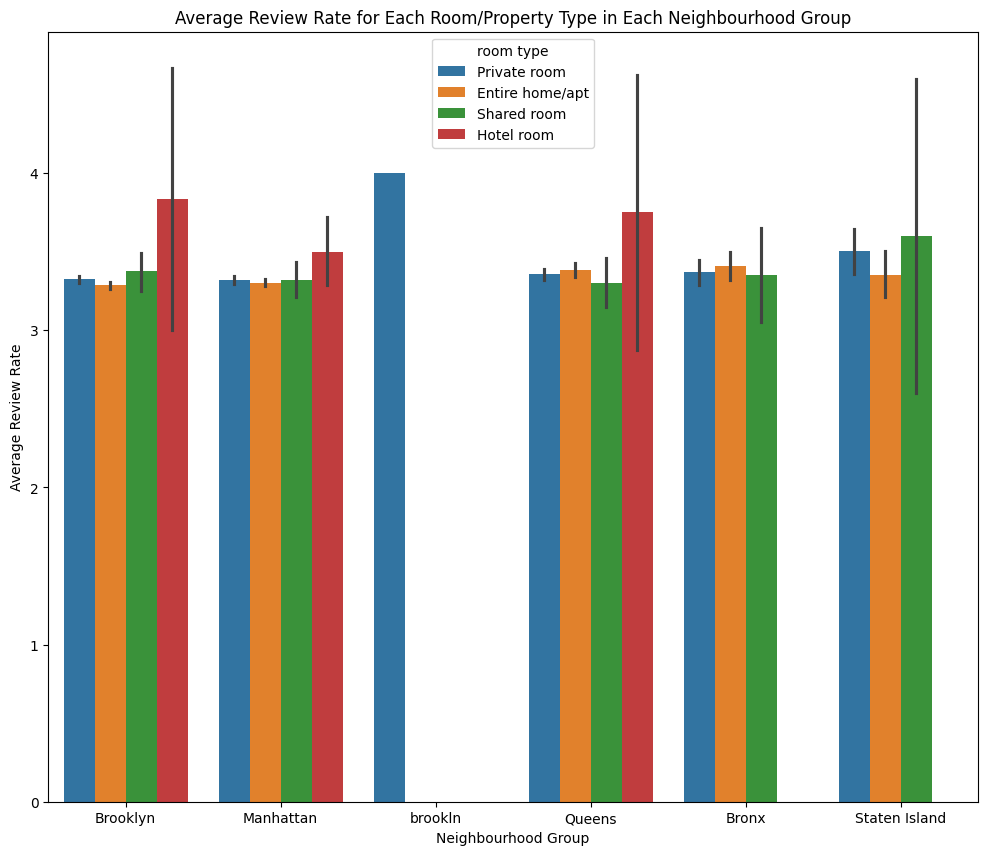

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Set figure size
plt.figure(figsize=(12, 10))

# Step 2: Create barplot
# x-axis → neighborhood group
# y-axis → average review rate
# hue → room type to separate bars by color
sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type')

# Step 3: Add labels and title
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for Each Room/Property Type in Each Neighbourhood Group')

# Step 4: Show plot
plt.show()

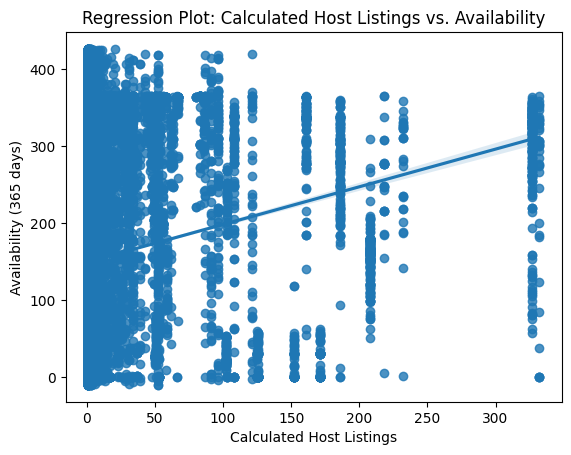

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create regression plot
# x-axis → calculated host listings count
# y-axis → availability throughout the year (365 days)
sns.regplot(x='calculated host listings count', y='availability 365', data=df)

# Step 2: Add labels and title
plt.xlabel('Calculated Host Listings')
plt.ylabel('Availability (365 days)')
plt.title('Regression Plot: Calculated Host Listings vs. Availability')

# Step 3: Show plot
plt.show()

In [48]:
# Calculate correlation between host listings count and availability
correlation = df['calculated host listings count'].corr(df['availability 365'])
print("Correlation between host listings count and availability:", correlation)

Correlation between host listings count and availability: 0.11438399072049502
